In [1]:
from APSpec import Spectrometer
from matplotlib import pyplot
import numpy as np
import time

In [2]:
# Instantiate an Instance of the Spectrometer
Spec = Spectrometer()
# Set integration time to 20 (milliseconds)
Spec.SetIntTime(20)
# Initialize a list to store "Reference" Spectral Data 
# Ref_Data=[]

In [3]:
# Capture Reference Spectra or "Dark Signal" from the Spectrometer
# Switch off the light signal or cover the exposed fiber connector with a dustcap.
Ref_Data=Spec.GetSpectra()

In [4]:
# Ref_Data is an array of 1500 pixel values read from the CCD Sensor
# Examine the first few element of captured spectral data 
# For 20msec Integration time, typical dark signal values arein 800 +/-50 range
Ref_Data[:15]

[841, 837, 834, 839, 835, 841, 832, 831, 833, 841, 833, 832, 832, 829, 832]

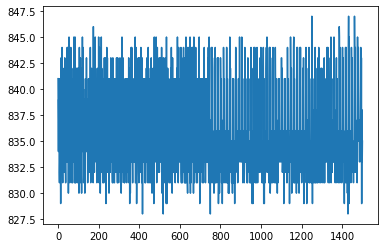

In [5]:
#plot the reference data or the Dark Signal for a review
pyplot.plot(Ref_Data)

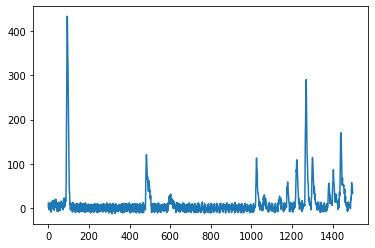

In [6]:
# Initialize a list to capture spectral data (with the Optical light source ON)
# Turn the light source ON and capture the data from Spectrometer
Spectral_Data=[]
# MAKE SURE THE LIGHT SOURCE is ON
Spectral_Data=Spec.GetSpectra()
# Substract the Reference reading from the captured Spectra
Difference = [(Ref_Data[i]-Spectral_Data[i]) for i in range(len(Ref_Data))]
pyplot.plot(Difference)

In [7]:
#Let find index of few tallest peaks in the Spectra
for i in [Difference.index(i) for i in sorted(Difference, reverse=True)][0:20]:
    print(i,Difference[i],";",end='')

93 433 ;94 431 ;92 389 ;95 381 ;96 342 ;97 322 ;91 311 ;1270 290 ;1269 286 ;98 271 ;1271 267 ;90 242 ;1268 238 ;99 226 ;1272 221 ;1267 189 ;1273 173 ;1441 170 ;1441 170 ;1440 168 ;

In [15]:
# Looking at the captured Spectra and Specifications of HG2 Calibration source, We can make a list of 
# wavelength peaks corressponding pixels.
wavlens=[435.8,546,696.5,763.5,811.5]
pixels=[93,484,1027,1271,1443]

# Now Use numpy's polyfit function and fit a 2nd order polynomial to these points, with X axis as pixels and Y axis
# as Wavelengths. You can choose higher a order polynomial and more points from the spectra to calibrate.
Z=np.polyfit(pixels,wavlens,2)

print(Z)
# These are calibration coefficients of our second order polynomial Y = Z[2] + Z[1]*X + Z[0]*X^2
# Store these into the Spectrometer memory with a WriteCal.
Spec.WriteCal(-0.000002759,0.282167,409.7367)
time.sleep(0.1)
# Reread stored calibration Coefficients.
C=Spec.ReadCal()
print(C)

[-2.75914372e-06  2.82167481e-01  4.09736726e+02]
[-2.758999926300021e-06, 0.282166987657547, 409.7366943359375]


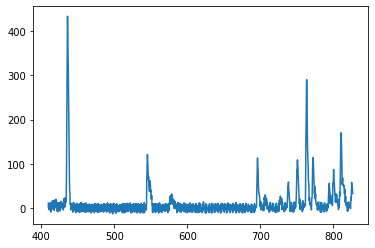

In [16]:
# Compose a Calibration polynomial with Calibration coefficients determined in the previous step. 
# Convert X axis from pixels to wavelengths and plot the captured spectra as wavelength versus amplitude.
Calpoly=np.poly1d(C)
Xval=np.arange(0,1500,1)
Xcal=Calpoly(Xval)
pyplot.plot(Xcal,Difference); pyplot.show()